Superstore Sales Analysis 

Importing Libraries

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Superstore_1.0.csv",encoding='latin-1')


Making df's copy

In [ ]:
df_copy = df.copy()

Data Summery of Superstore.csv

This data is about Superstore sales. That contain 21 columns - 
Row ID , Order ID , Order Date , Ship Date , Ship Mode , Customer ID , Customer Name , Segment , Country , City , State , Postal Code , Region , Product ID , Category , Sub-Category , Product Name , Sales , Quantity , Discount , Profit


Mistakes in data - 
1. Column - Order Date and Ship Date have obj dtype

Type caste into date

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

some function to check data

In [18]:
print(df.describe())
print(df.info())
df.isnull().sum()
df.sample(5)


To check whether there are any invaild dates

In [ ]:

Invalid_dates = df['Order Date'] > df['Ship Date']
df[Invalid_dates]

In [87]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


Summaries Data - 
    Total Sales , 
    avg order value , 
    top Selling Products


In [88]:
Total_sales = (df['Sales'].sum()).round()

Total_profit = (df['Profit'].sum()).round()

avg_value = (df['Sales'].mean()).round()

Top_selling_Category = (df.groupby(['Category'])['Sales'].sum()).idxmax()

Top_selling_sub_category = (df.groupby(['Sub-Category'])['Sales'].sum()).idxmax()

Top_selling_product = (df.groupby(['Product Name'])['Sales'].sum()).idxmax()

Top_selling_city = (df.groupby(['City'])['Sales'].sum()).idxmax()

print(f"""\t Superstore \nTotal Sales - {Total_sales} USD 
Total Profit - {Total_profit} USD
The avg order price - {avg_value} USD 
Top selling Category - {Top_selling_Category}
Top selling Sub Category - {Top_selling_sub_category}
Top Selling Product - {Top_selling_product} 
Top Selling City - {Top_selling_city}""")


	 Superstore 
Total Sales - 2297201.0 USD 
Total Profit - 286397.0 USD
The avg order price - 230.0 USD 
Top selling Category - Technology
Top selling Sub Category - Phones
Top Selling Product - Canon imageCLASS 2200 Advanced Copier 
Top Selling City - New York City


-----------------------------------

Correlation between discount and profit

<Axes: xlabel='Discount', ylabel='Profit'>

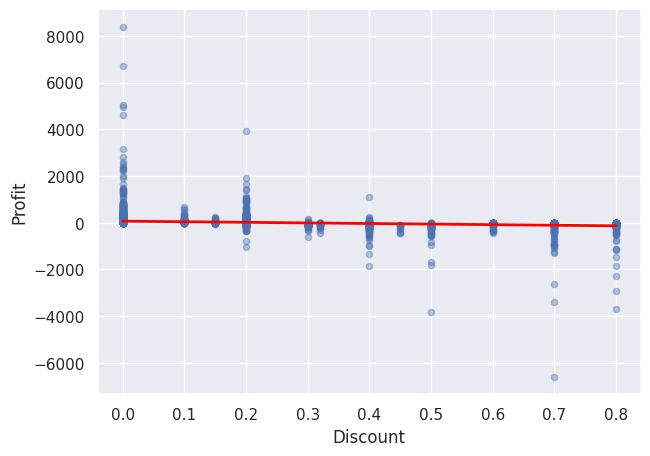

In [109]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.regplot(data=df, x = 'Discount', y = 'Profit' , scatter_kws={'alpha': 0.4, 's': 20}, line_kws={'color': 'red','linewidth': 2})
